<a href="https://colab.research.google.com/github/akhil1729/Python-Projects/blob/main/602_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2

## Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

**Note:** The derived (reshaped) data frame should comprise one row for each distinct date in the data set, and 25 columns (representing date together with 24 hourly measurements).  Assign a new column calculated as the difference between `tmpmeas14` and `tmpmeas2`.  This calculated column represents the temperature increase for the day between 2:56 and 14:56.  Find the summary statistics (mean, max, min, and standard deviation) for this column.

In [ ]:
#let's check the dataframe structure
wdf

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
67198,2023-09-01 15:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0
67199,2023-09-01 16:54:00-04:00,4.6,26.7,0.0,0,1.0,0,0,0,0
67200,2023-09-01 17:54:00-04:00,3.6,26.1,0.0,0,1.0,0,0,0,0
67201,2023-09-01 18:54:00-04:00,3.6,24.4,0.0,0,1.0,0,0,0,0


In [ ]:
# We have a column having date with timestamps , lets us Convert 'DATE' column to datetime, ensuring errors are coerced
wdf['DATE'] = pd.to_datetime(wdf['date'], errors='coerce').dt.tz_localize(None)

# There are few records with missing values, so let us drop those rows
wdf = wdf.dropna(subset=['date'])

# Extracting date and hour seperately from the DATE column for representing hourly temperature observation
wdf['date_only'] = wdf['date'].dt.date
wdf['hour'] = wdf['date'].dt.hour

# Pivoting the data to have one row per date and one column per hour (hourly temperature observations)
pivot_data = wdf.pivot_table(
    index='date_only',
    columns='hour',
    values='tmp_meas',
    aggfunc='first'  # if there are duplicate values, the first occurence will be considered.
)
#here is how the hourly observation data look like
display(pivot_data)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date_only,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.6,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,8.3,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,11.1,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,1.1,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,23.9,23.3,23.3,23.3,23.3,23.3,22.8,23.9,24.4,25.0,...,26.1,25.6,25.6,25.0,25.0,24.4,23.9,23.3,23.9,23.9
2023-08-29,23.9,23.3,23.3,22.8,22.8,22.2,22.8,22.8,22.8,23.3,...,27.2,27.2,26.7,26.1,26.1,25.6,25.0,23.9,25.0,24.4
2023-08-30,23.9,23.9,23.9,23.9,23.3,23.9,23.9,23.9,26.1,26.7,...,30.6,30.6,30.6,28.9,27.2,25.6,23.9,23.9,22.8,21.7


In [ ]:
# For calculating the mean temperature differences at 2pm and 2am let's rename the columns as temp_at_T where T represents the time (24 hour format) 0 refers 12 am and 23 refers 11 pm
pivot_data.columns = [f'temp_at_{int(col)}' for col in pivot_data.columns]

#Calculatting the difference between 14:56 and 2:56
pivot_data['temp_measure_diff'] = pivot_data['temp_at_14'] - pivot_data['temp_at_2']
display(pivot_data)

,temp_at_0,temp_at_1,temp_at_2,temp_at_3,temp_at_4,temp_at_5,temp_at_6,temp_at_7,temp_at_8,temp_at_9,...,temp_at_15,temp_at_16,temp_at_17,temp_at_18,temp_at_19,temp_at_20,temp_at_21,temp_at_22,temp_at_23,temp_measure_diff
date_only,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6,NaN
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6,1.7
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7,10.0
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1,13.3
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,23.9,23.3,23.3,23.3,23.3,23.3,22.8,23.9,24.4,25.0,...,25.6,25.6,25.0,25.0,24.4,23.9,23.3,23.9,23.9,2.8
2023-08-29,23.9,23.3,23.3,22.8,22.8,22.2,22.8,22.8,22.8,23.3,...,27.2,26.7,26.1,26.1,25.6,25.0,23.9,25.0,24.4,3.9
2023-08-30,23.9,23.9,23.9,23.9,23.3,23.9,23.9,23.9,26.1,26.7,...,30.6,30.6,28.9,27.2,25.6,23.9,23.9,22.8,21.7,6.7


In [ ]:
#Calculate summary statistics for the temperature difference
mean_diff = pivot_data['temp_measure_diff'].mean()
std_dev_diff = pivot_data['temp_measure_diff'].std()
max_diff = pivot_data['temp_measure_diff'].max()
min_diff = pivot_data['temp_measure_diff'].min()

# Print the summary statistics
print(f"Average difference in temperature: {mean_diff}")
print(f"Standard deviation of temperature difference: {std_dev_diff}")
print(f"Maximum temperature difference: {max_diff}")
print(f"Minimum temperature difference: {min_diff}")

Average difference in temperature: 7.1876476906552105
Standard deviation of temperature difference: 4.839827153804049
Maximum temperature difference: 22.8
Minimum temperature difference: -16.1


## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [ ]:
cdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,,2011-12-09 12:39:00
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,,2011-12-09 12:01:59
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00
...,...,...,...,...,...,...,...,...,...
7891740,500314103,LTC338,MD,30,Red Light Violation,75,2023-07-27 14:24:00-04:00,,2023-07-27 14:24:00
7891741,500314104,1FH5756,MD,30,Red Light Violation,75,2023-07-27 14:28:00-04:00,,2023-07-27 14:28:00
7891742,500314105,64390CD,MD,30,Red Light Violation,75,2023-07-27 14:29:00-04:00,,2023-07-27 14:29:00
7891743,500314106,2BA2462,MD,31,Right on Red,75,2023-07-27 14:29:59-04:00,,2023-07-27 14:29:59


In [ ]:

# Convert the violation timestamp column to datetime
cdf['violdate'] = pd.to_datetime(cdf['violdate'], errors='coerce').dt.tz_localize(None)

# let's initiate the start and end dates
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-07-01')

# Filter the dataframe to keep only records between the start and end dates
cdf_filtered = cdf[(cdf['violdate'] >= start_date) & (cdf['violdate'] <= end_date)]
display(cdf_filtered)

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
4632,001713171,N73LDS,NJ,12,No Stopping/Standing Not Tow-Away Zone,32,2021-01-31 18:40:00,,2021-01-31 18:40:00
4633,001713189,9ET0286,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00,,2021-12-29 17:00:00
4634,001713197,9EP2809,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00,,2021-12-29 17:00:00
7770,003481843,3EJ7926,MD,99,All Other Stopping or Parking Violations,32,2021-08-27 18:45:00,,2021-08-27 18:45:00
10928,000130278,19213CD,MD,27,No Stop/Park Street Cleaning,52,2021-06-06 23:40:00,"(39.28997272, -76.61002178)",2021-06-06 23:40:00
...,...,...,...,...,...,...,...,...,...
7748711,040091366,6EN4856,MD,37,Truck Overheight Second Violation,125,2021-08-26 18:41:00,,2021-08-26 18:41:00
7816491,006227442,5AD5724,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-09-22 05:45:00,,2021-09-22 05:45:00
7816492,006227459,5EB6003,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-09-22 05:50:00,,2021-09-22 05:50:00
7816493,006227467,2DY7222,MD,17,Less Than 15 feet from Fire Hydrant,77,2021-09-22 06:00:00,,2021-09-22 06:00:00


Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [ ]:
#Identify the 5 most common violation types
top_5_violations = cdf_filtered['description'].value_counts().nlargest(5).index
top_5_violations_list = top_5_violations.tolist()
print("The 5 most common violation types are \n")
print(top_5_violations_list)

# Step 2: Filter the dataframe to keep only observations with the top 5 violation descriptions
cdf_filtered_top5 = cdf[cdf['description'].isin(top_5_violations)]

# Display the filtered dataframe with only the top 5 violation descriptions
print("\n The dataframe with only the top 5 violation descriptions \n")
display(cdf_filtered_top5)

The 5 most common violation types are 

['Fixed Speed Camera', 'Red Light Violation', 'Right on Red', 'All Other Parking Meter Violations', 'Expired Tags']

 The dataframe with only the top 5 violation descriptions 



,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00
16,000001313,1AG6448,MD,18,All Other Parking Meter Violations,32,2011-12-12 11:55:00,,2011-12-12 11:55:00
17,000001388,27930M3,MD,18,All Other Parking Meter Violations,32,2011-12-12 14:42:59,,2011-12-12 14:42:59
18,000001487,6CZD50,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:40:00,,2011-12-27 10:40:00
19,000001495,4AM9379,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:44:00,,2011-12-27 10:44:00
...,...,...,...,...,...,...,...,...,...
7891740,500314103,LTC338,MD,30,Red Light Violation,75,2023-07-27 14:24:00,,2023-07-27 14:24:00
7891741,500314104,1FH5756,MD,30,Red Light Violation,75,2023-07-27 14:28:00,,2023-07-27 14:28:00
7891742,500314105,64390CD,MD,30,Red Light Violation,75,2023-07-27 14:29:00,,2023-07-27 14:29:00
7891743,500314106,2BA2462,MD,31,Right on Red,75,2023-07-27 14:29:59,,2023-07-27 14:29:59


Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [ ]:
import numpy as np
from typing import Tuple


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [ ]:
cdf_filtered['violdate'] = pd.to_datetime(cdf_filtered['violdate'])


# Step 1: Extract hours and minutes from 'violdate'
cdf_filtered['hour'] = cdf_filtered['violdate'].dt.hour
cdf_filtered['minute'] = cdf_filtered['violdate'].dt.minute

# Step 2: Convert time of day to angles
cdf_filtered['theta'] = timetotheta(cdf_filtered['hour'], cdf_filtered['minute'])

# Step 3: Compute the circular mean for each violation type
def circular_mean(group):
    sin_mean = np.sin(group).mean()
    cos_mean = np.cos(group).mean()
    return np.arctan2(sin_mean, cos_mean)

grouped = cdf_filtered.groupby('description')['theta'].apply(circular_mean).reset_index()
grouped = grouped.dropna(subset=['theta'])

# Step 4: Convert average angles back to time
grouped['average_time'] = thetatotime(grouped['theta'])

# Display the average time of day for each violation type
print(grouped[['description', 'average_time']])


<ipython-input-12-34c3d6947af8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_filtered['violdate'] = pd.to_datetime(cdf_filtered['violdate'])
<ipython-input-12-34c3d6947af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_filtered['hour'] = cdf_filtered['violdate'].dt.hour
<ipython-input-12-34c3d6947af8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

                                          description average_time
0                                  Abandonded Vehicle        11:29
1                  All Other Parking Meter Violations        12:57
2            All Other Stopping or Parking Violations        13:56
3                         Blocking Garage or Driveway        13:50
4            Commercial Veh/Residence over 20,000 lbs        18:20
5           Commercial Veh/Residence under 20,000 lbs        17:41
6      Commercial Vehicle Obstruct/Imped Traffic Flow        12:42
7                                  Exceeding 48 Hours        11:25
8                                        Expired Tags        11:39
9                     Fire Lane/Handicapped Violation        20:56
10                                 Fixed Speed Camera        13:22
11                                   In Taxicab Stand        14:41
13                       Less 30â€™ from Intersection        00:29
14                Less Than 15 feet from Fire Hydrant        1

The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [ ]:
 #let us One-hot encode the 'description' column adding a prefix as violationType
ohe_df = pd.get_dummies(cdf['description'], prefix='violationType')

# create a new dataframe cdf_ohe with one-hot encoded variables added to the original dataframe
cdf_ohe = pd.concat([cdf, ohe_df], axis=1)

# Display the updated dataframe with one-hot encoded columns
print("\nDataFrame with One-Hot Encoded Variables added:")
display(cdf_ohe.head())


DataFrame with One-Hot Encoded Variables added:


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violationType_Abandonded Vehicle,...,violationType_Res. Park Permit 2nd Offense,violationType_Res. Park Permit 3rd Offense,violationType_Res. Park Permit 4th Offense,violationType_Residential Parking Permit Only,violationType_Right on Red,violationType_Snow Emergency Route Violation,violationType_Truck Overheight Second Violation,violationType_Truck Overheight Third or Subsequent Violation,violationType_Truck Overheight Warning Notice,violationType_Unlawful Dumping/Waste Hauler w/o Permit
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00,,2011-12-09 11:55:00,False,...,False,False,False,False,False,False,False,False,False,False
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00,,2011-12-09 12:39:00,False,...,False,False,False,False,False,False,False,False,False,False
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00,,2011-12-09 11:55:00,False,...,False,False,False,False,False,False,False,False,False,False
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59,,2011-12-09 12:01:59,False,...,False,False,False,False,False,False,False,False,False,False
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00,False,...,False,False,False,False,False,False,False,False,False,False


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [ ]:
# Convert 'violdate' in cdf and 'date' in wdf to datetime format
# Ensure both are timezone-naive and have the same precision
cdf['violdate'] = pd.to_datetime(cdf['violdate'], errors='coerce').dt.tz_localize(None).astype('datetime64[ns]')
wdf['date'] = pd.to_datetime(wdf['date'], errors='coerce').dt.tz_localize(None).astype('datetime64[ns]')

# Sort both dataframes by their date columns to ensure proper merging
cdf = cdf.sort_values(by='violdate')
wdf = wdf.sort_values(by='date')

# Perform asof merge to get the closest weather observation for each citation
merged_df = pd.merge_asof(cdf, wdf, left_on='violdate', right_on='date', direction='backward')

# Display the first few rows of the merged dataframe
display(merged_df.head())

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,date,...,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,DATE,date_only,hour
0,040231789,YRJ641,MD,30,Red Light Violation,75,1999-07-27 04:11:00,,1999-07-27 04:11:00,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,041021270,GES259,MD,30,Red Light Violation,75,2000-05-26 14:41:00,,2000-05-26 14:41:00,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,041036682,CYX244,MD,30,Red Light Violation,75,2000-06-01 18:59:59,,2000-06-01 18:59:59,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,041379157,DYH813,MD,30,Red Light Violation,75,2000-08-26 01:47:00,,2000-08-26 01:47:00,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,043219849,A006827,MD,30,Red Light Violation,75,2002-01-26 09:11:59,,2002-01-26 09:11:59,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: you do not need to provide a statistical proof; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [ ]:
#let's drop the null records which don't have relation in weather and citations data
merged_df=merged_df.dropna()
# Let's filter the  merged dataframe for fixed speed camera citations with (violation code 32)
fixed_speed_citations = merged_df[merged_df['violcode'] == 32]
display(fixed_speed_citations)

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,date,...,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,DATE,date_only,hour
1522673,080000012,2CB1473,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00,,2017-07-31 06:00:00,2017-07-31 05:54:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017-07-31 05:54:00,2017-07-31,5.0
1522674,080000004,DVA0034,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:00:00,2017-07-31 05:54:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017-07-31 05:54:00,2017-07-31,5.0
1522675,080000020,5CY5814,MD,32,Fixed Speed Camera,40,2017-07-31 06:04:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:04:00,2017-07-31 05:54:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017-07-31 05:54:00,2017-07-31,5.0
1522676,080000038,5CW6500,MD,32,Fixed Speed Camera,40,2017-07-31 06:06:00,,2017-07-31 06:06:00,2017-07-31 05:54:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017-07-31 05:54:00,2017-07-31,5.0
1522677,080000046,5CL9930,MD,32,Fixed Speed Camera,40,2017-07-31 06:08:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 06:08:00,2017-07-31 05:54:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017-07-31 05:54:00,2017-07-31,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882389,300839259,LJT7650,PA,32,Fixed Speed Camera,40,2023-07-27 17:23:00,,2023-07-27 17:23:00,2023-07-27 16:54:00,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2023-07-27 16:54:00,2023-07-27,16.0
7882390,300839260,5EK2832,MD,32,Fixed Speed Camera,40,2023-07-27 17:23:00,,2023-07-27 17:23:00,2023-07-27 16:54:00,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2023-07-27 16:54:00,2023-07-27,16.0
7882391,300839261,1DK4401,MD,32,Fixed Speed Camera,40,2023-07-27 17:23:00,,2023-07-27 17:23:00,2023-07-27 16:54:00,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2023-07-27 16:54:00,2023-07-27,16.0
7882393,300839263,4CDN91,MD,32,Fixed Speed Camera,40,2023-07-27 17:24:00,,2023-07-27 17:24:00,2023-07-27 16:54:00,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2023-07-27 16:54:00,2023-07-27,16.0


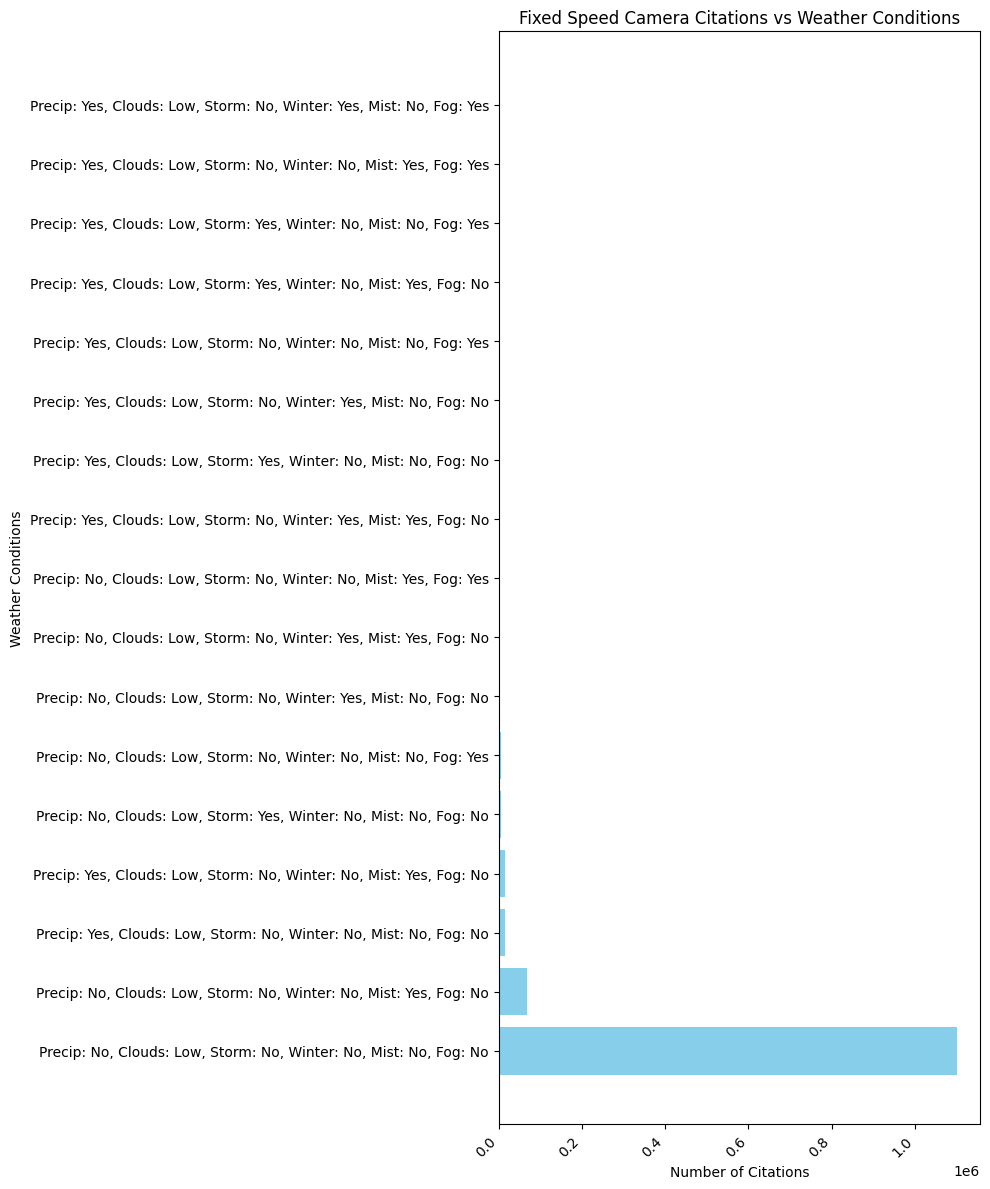

In [ ]:

# Define a function to label weather conditions more clearly
def label_weather_conditions(row):
    precip = 'Precip: ' + ('Yes' if row['precip'] > 0 else 'No')
    cloudcover = 'Clouds: ' + ('High' if row['cloudcover'] > 5 else 'Low')
    tstorm = 'Storm: ' + ('Yes' if row['tstorm'] > 0 else 'No')
    winter = 'Winter: ' + ('Yes' if row['winter'] > 0 else 'No')
    mist = 'Mist: ' + ('Yes' if row['mist'] > 0 else 'No')
    fog = 'Fog: ' + ('Yes' if row['fog'] > 0 else 'No')

    # Combine the conditions into a readable string
    return f"{precip}, {cloudcover}, {tstorm}, {winter}, {mist}, {fog}"

# Group by weather conditions and count citations
weather_citation_stats = fixed_speed_citations.groupby(
    ['precip', 'cloudcover', 'tstorm', 'winter', 'mist', 'fog']
).size().reset_index(name='citation_count')

# Sort the data by citation count for better visualization
weather_citation_stats = weather_citation_stats.sort_values('citation_count', ascending=False)

# Create clear weather condition labels
weather_citation_stats['weather_conditions'] = weather_citation_stats.apply(label_weather_conditions, axis=1)

# Plot the horizontal bar chart with improved labels
plt.figure(figsize=(10, 12))
plt.barh(weather_citation_stats['weather_conditions'], weather_citation_stats['citation_count'], color='skyblue')

# Set labels
plt.xlabel('Number of Citations')
plt.ylabel('Weather Conditions')
plt.title('Fixed Speed Camera Citations vs Weather Conditions')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



This bar chart visualizes the number of fixed speed camera citations under various weather conditions. The weather conditions are described on the y-axis with specific labels, such as "Precip: Yes, Clouds: Low, Storm: No, Winter: No, Mist: No, Fog: No," and others that combine the presence of precipitation, cloud cover, storms, winter conditions, mist, and fog.


**Key points to be observed from the bar chart:**


**Most Common Weather Condition**: The weather condition where there was no precipitation, low cloud cover, no storm, no winter, no mist, and no fog accounted for the majority of citations. The corresponding bar is the longest, indicating that a significant number of citations occurred under relatively clear weather conditions.

**Citations in Adverse Conditions**: Citations also occurred under adverse weather conditions (precipitation, mist, and fog), but the numbers are significantly lower compared to clear weather. This suggests that while citations still happen in adverse weather, they are far fewer compared to clear or mild conditions.

**Outliers**: Some weather conditions (e.g., "Precip: Yes, Clouds: Low, Storm: Yes, Winter: No, Mist: Yes, Fog: Yes") have a noticeably smaller number of citations. These outliers indicate that certain combinations of severe weather features are associated with fewer citations, likely because drivers are more cautious in bad weather.


**Conclusion:**

Impact of Weather: Based on this descriptive analysis, it appears that most citations occur during clear or mild weather, suggesting that weather conditions do impact mild citation volumes. Fewer citations are issued during adverse weather conditions (such as storms, fog, or precipitation), which may reflect changes in driver behavior, such as reduced speeds or increased caution during such times.